In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [114]:
nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot.csv")
nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot.csv")

nue_nue_vars_tot = defaultdict(list)
nue_nue_weights_tot = defaultdict(list)


nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
nue_nue_vars_tot.pop("Unnamed: 0")
nue_nue_weights_tot.pop("Unnamed: 0")

poplist = []

for c in nue_nue_vars_tot.keys():
    if len(nue_nue_weights_tot[c][0]) > 2:
        nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
        nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
        nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
    else:
        poplist.append(c)
        
for c in nue_nue_vars_tot.keys():
    if len(nue_nue_vars_tot[c][0]) > 2:
        nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
        nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
        nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))
        
for i in poplist:
    nue_nue_vars_tot.pop(i)
    nue_nue_weights_tot.pop(i)

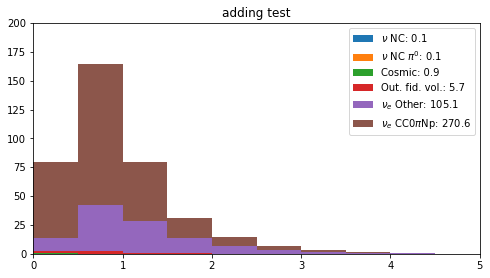

In [115]:
category_labels = {
    1: r"$\nu_e$ Other",
    11110: r"$\nu_e$",
    11111: r"$\bar\nu_e$",
    10: r"$\nu_e$ CC0$\pi$0p",
    9: r"$\bar\nu_e$ CC0$\pi$0p",
    12: r"$\bar\nu_e$ CC0$\pi$Np",
    11: r"$\nu_e$ CC0$\pi$Np",
    11357: r"$\nu_e$ CC $\pi^{0}$",
    111: r"MiniBooNE LEE",
    2: r"$\nu_{\mu}$ CC",
    21: r"$\nu_{\mu}$ CC $\pi^{0}$",
    22: r"$\nu_{\mu}$ CC 0p$^+$",
    23: r"$\nu_{\mu}$ CC 1p$^+$",
    24: r"$\nu_{\mu}$ CC 2p$^+$",
    25: r"$\nu_{\mu}$ CC Np$^+$",
    3: r"$\nu$ NC",
    31: r"$\nu$ NC $\pi^{0}$",
    4: r"Cosmic",
    5: r"Out. fid. vol.",
    # eta categories start with 80XX
    801: r"$\eta \rightarrow$ other",
    802: r"$\nu_{\mu} \eta \rightarrow \gamma\gamma$",
    803: r'1 $\pi^0$',
    804: r'2 $\pi^0$',
    805: r'$\nu$ other',
    806: r'out of FV',
    6: r"other",
    0: r"No slice"
}

    
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot[str(c)][0])) \
            if sum(nue_nue_weights_tot[str(c)][0]) else ""
            for c in nue_nue_vars_tot.keys()
        ]


pup = list(nue_nue_vars_tot.values())

i = 0
for c in nue_nue_vars_tot.keys():
    nue_nue_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot.values())

i = 0
for c in nue_nue_weights_tot.keys():
    nue_nue_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
        


#print("")
#print("HERE")
#print(nue_nue_vars_tot)
#print("")
#print("HERE")
#print(nue_nue_vars_tot.values())
#print(len(nue_nue_vars_tot.values()[0]))
#print(len(nue_nue_weights_tot.values()[0]))

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
nue_ax1.set_ylim([0, 200])

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reconstructed Energy [GeV]"

nue_stacked = nue_ax1.hist(
            nue_nue_vars_tot.values(),
            weights=list(nue_nue_weights_tot.values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)

plt.title("adding test")
plt.legend()